Source : Kaggle

Dataset name : Identifying Disease in Tea leaves

*   Link of dataset

Dataset Link : https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs


Invalid dataset specification https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs


In [7]:
!kaggle datasets download -d shashwatwork/identifying-disease-in-tea-leafs

Dataset URL: https://www.kaggle.com/datasets/shashwatwork/identifying-disease-in-tea-leafs
License(s): CC-BY-SA-4.0
 99% 736M/740M [00:09<00:00, 96.2MB/s]
100% 740M/740M [00:09<00:00, 80.1MB/s]


In [10]:
import zipfile
# Change the filename to match what was downloaded
zip_ref = zipfile.ZipFile('/content/identifying-disease-in-tea-leafs.zip', 'r')
zip_ref.extractall('/content/dataset')
zip_ref.close()

In [11]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfl

import matplotlib.pyplot as plt

import numpy as np

%load_ext tensorboard

In [12]:
batch_size=32
img_height=256
img_width=256

train_dir='/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset'

In [14]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfl

import matplotlib.pyplot as plt

import numpy as np

%load_ext tensorboard

batch_size=32
img_height=256
img_width=256

# Verify this path is correct. If using Kaggle or Colab,
# make sure the dataset is mounted correctly.
train_dir='/content/dataset/tea sickness dataset'

train_ds=tfk.utils.image_dataset_from_directory(
    train_dir,
    seed=42,
    validation_split=0.1,
    subset='training',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

val_ds=tfk.utils.image_dataset_from_directory(
    train_dir,
    seed=42,
    validation_split=0.1,
    subset='validation',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Found 885 files belonging to 8 classes.
Using 797 files for training.
Found 885 files belonging to 8 classes.
Using 88 files for validation.


In [15]:
class_names = train_ds.class_names

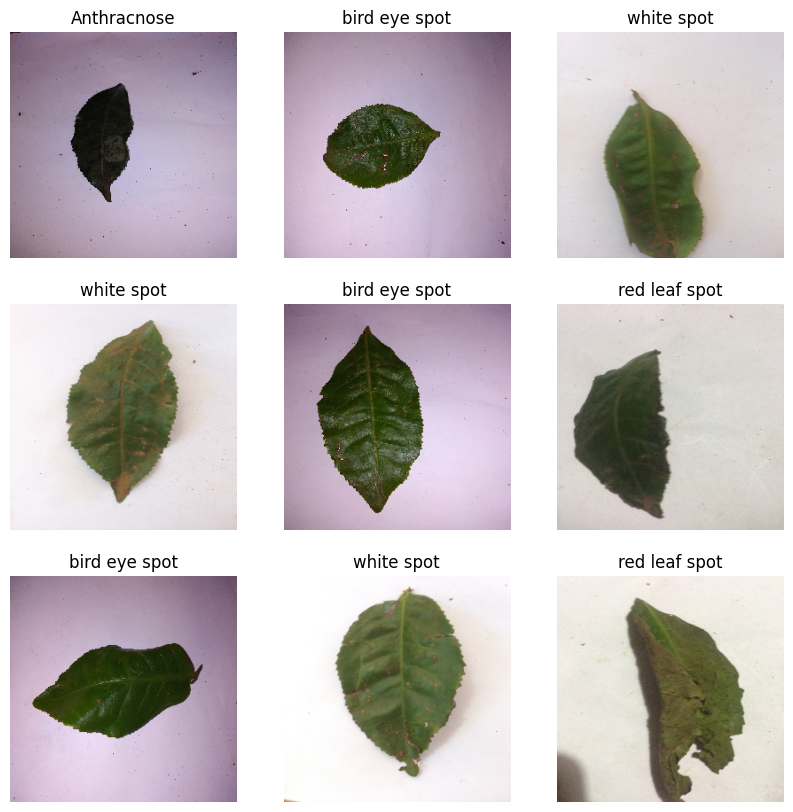

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [17]:
model=tfk.Sequential([
    # block 1
    tfl.Conv2D(32,3,padding='same'),
    tfl.BatchNormalization(),
    tfl.ReLU(),
    tfl.MaxPooling2D((2,2)),
    #block 2
    tfl.Conv2D(64,3,padding='same'),
    tfl.BatchNormalization(),
    tfl.ReLU(),
    tfl.MaxPooling2D((2,2)),
    # #block3
    tfl.Conv2D(128,3,padding='same'),
    tfl.BatchNormalization(),
    tfl.ReLU(),
    tfl.MaxPooling2D((2,2)),

    tfl.Flatten(),

    tfl.Dense(64,),
    tfl.BatchNormalization(),
    tfl.ReLU(),
    tfl.Dropout(rate= 0.2, seed= 123),
    # tfl.BatchNormalization(),
    tfl.Dense(128),
    tfl.BatchNormalization() ,
    tfl.ReLU(),
    tfl.Dropout(rate= 0.2, seed= 123),
    # # tfl.BatchNormalization(),
    tfl.Dense(256),
    tfl.BatchNormalization() ,
    tfl.ReLU(),
    tfl.Dropout(rate= 0.2, seed= 123),


    tfl.Dense(8,activation='softmax')
])

In [18]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)

model.compile(optimizer=tfk.optimizers.Adamax(learning_rate= lr_schedule),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,validation_data=val_ds, batch_size=32,epochs=25)

Epoch 1/25
25/25 [==============================] - 199s 7s/step - loss: 1.4689 - accuracy: 0.4655 - val_loss: 3.6852 - val_accuracy: 0.1932
Epoch 2/25
25/25 [==============================] - 190s 7s/step - loss: 0.8762 - accuracy: 0.6976 - val_loss: 2.0469 - val_accuracy: 0.2955
Epoch 3/25
25/25 [==============================] - 183s 7s/step - loss: 0.6447 - accuracy: 0.7666 - val_loss: 2.3216 - val_accuracy: 0.3182
Epoch 4/25
25/25 [==============================] - 190s 7s/step - loss: 0.5533 - accuracy: 0.8080 - val_loss: 1.5089 - val_accuracy: 0.4886
Epoch 5/25
25/25 [==============================] - 186s 7s/step - loss: 0.4332 - accuracy: 0.8519 - val_loss: 3.2067 - val_accuracy: 0.2386
Epoch 6/25
25/25 [==============================] - 181s 7s/step - loss: 0.3738 - accuracy: 0.8821 - val_loss: 1.3763 - val_accuracy: 0.4545
Epoch 7/25
25/25 [==============================] - 193s 7s/step - loss: 0.3244 - accuracy: 0.8946 - val_loss: 0.8926 - val_accuracy: 0.7273
Epoch 8/25
25

In [20]:
model.evaluate(val_ds)

3/3 [==============================] - 8s 2s/step - loss: 0.4852 - accuracy: 0.8750


[0.4851961135864258, 0.875]

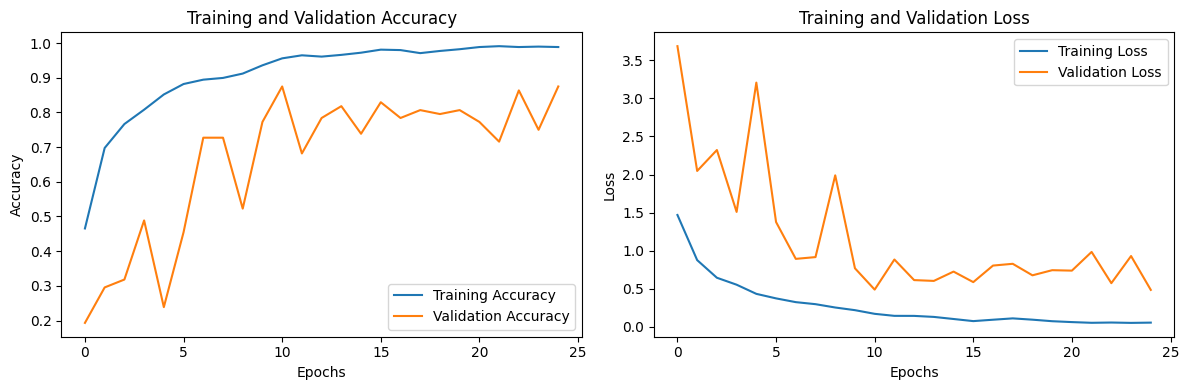

In [21]:
# Plotting the training history
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**2nd  MODEL **

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Define data directories
data_dir = '/content/dataset'
train_dir = os.path.join(data_dir, '/content/dataset/tea sickness dataset')
test_dir = os.path.join(data_dir, '/content/dataset/tea sickness dataset')

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')


Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

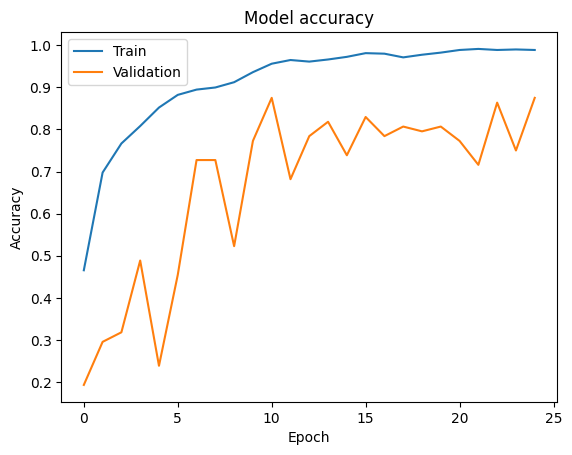

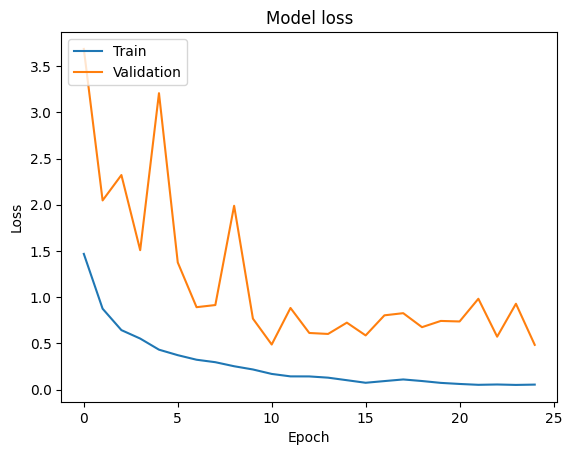

In [28]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [29]:
model.save('leaf_disease_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
!jupyter nbconvert --to html /content/Tea_Leaf_disease_pred.ipynb

[NbConvertApp] Converting notebook /content/Tea_Leaf_disease_pred.ipynb to html
[NbConvertApp] Writing 1765937 bytes to /content/Tea_Leaf_disease_pred.html


COLAB FILE LINK : https://colab.research.google.com/drive/1BQYifEEeDQSdf-7eeINUgXBBtVzzIs-F?usp=sharing